In [2]:
from IPython import get_ipython  #This should allow exported .py file to run as python script
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
allresults = pd.read_csv('./results/allresults.csv') 

athletenodes = allresults[['firstname','lastname','yearborn','racecode','Year']] 
racenodes = allresults[['firstname','lastname','yearborn','racecode','Year']] 
#athletenodes.loc[:,'athlete'] = athletenodes['firstname']+athletenodes['lastname']+athletenodes['yearborn'].astype(str)
#athletegraph_df = athletenodes.merge(athletenodes,how='inner',on=['racecode','Year']) 
racegraph_df = racenodes.merge(racenodes,how='inner',on=['firstname','lastname','yearborn']) 
racegraph_df.head()

,firstname,lastname,yearborn,racecode_x,Year_x,racecode_y,Year_y
0,JORDAN,JONES,1981,NY_2012,2012,NY_2012,2012
1,JORDAN,JONES,1981,NY_2012,2012,NY_2013,2013
2,JORDAN,JONES,1981,NY_2012,2012,NY_2014,2014
3,JORDAN,JONES,1981,NY_2013,2013,NY_2012,2012
4,JORDAN,JONES,1981,NY_2013,2013,NY_2013,2013


In [19]:
racegraph_df.loc[(racegraph_df['racecode_x']=='CH_2004') & (racegraph_df['racecode_y']=='DC_2011')]

,firstname,lastname,yearborn,racecode_x,Year_x,racecode_y,Year_y


In [11]:
racegraph_series_wt = racegraph_df.groupby(['racecode_x','racecode_y'])['firstname'].count()
racegraph_df_wt = racegraph_series_wt.reset_index()
racegraph_df_wt.columns = ['racecode_x','racecode_y','weight']
racegraph_df_wt[:20]

,racecode_x,racecode_y,weight
0,CH_2004,CH_2004,3469
1,CH_2004,CH_2005,1024
2,CH_2004,CH_2008,214
3,CH_2004,CH_2009,164
4,CH_2004,CH_2010,140
5,CH_2004,CH_2011,125
6,CH_2004,CH_2012,94
7,CH_2004,CH_2013,79
8,CH_2004,CH_2014,83
9,CH_2004,DC_2012,4


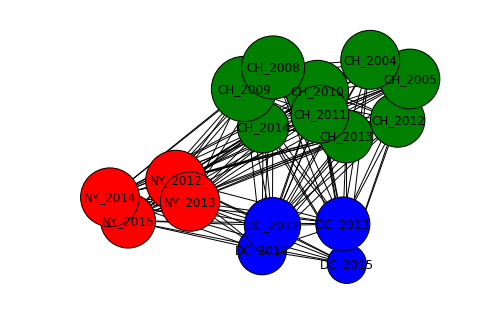

In [22]:
nodecolordict = {'CH': 'green',
              'DC': 'blue',
              'NY': 'red'}

racegraph = nx.from_pandas_dataframe(racegraph_df_wt, 'racecode_x', 'racecode_y', edge_attr=True)
node_color = [nodecolordict[node[0:2]] for node in racegraph]
node_size = [racegraph_df_wt.loc[(racegraph_df_wt['racecode_x']==node) & (racegraph_df_wt['racecode_y']==node)]['weight'].values[0] for node in racegraph]

#pos = nx.spring_layout(racegraph)
nx.draw(racegraph, node_color=node_color, node_size=node_size, with_labels=True)

#nx.draw_networkx_labels(racegraph,pos)
plt.show()

In [23]:
nx.edges(racegraph)


[('CH_2012', 'CH_2012'),
 ('CH_2012', 'NY_2012'),
 ('CH_2012', 'CH_2013'),
 ('CH_2012', 'DC_2014'),
 ('CH_2012', 'NY_2015'),
 ('CH_2012', 'DC_2015'),
 ('CH_2012', 'CH_2005'),
 ('CH_2012', 'CH_2004'),
 ('CH_2012', 'CH_2010'),
 ('CH_2012', 'CH_2011'),
 ('CH_2012', 'CH_2014'),
 ('CH_2012', 'NY_2013'),
 ('CH_2012', 'DC_2012'),
 ('CH_2012', 'DC_2013'),
 ('CH_2012', 'CH_2009'),
 ('CH_2012', 'CH_2008'),
 ('CH_2012', 'NY_2014'),
 ('NY_2012', 'NY_2012'),
 ('NY_2012', 'CH_2013'),
 ('NY_2012', 'DC_2014'),
 ('NY_2012', 'NY_2015'),
 ('NY_2012', 'DC_2015'),
 ('NY_2012', 'CH_2005'),
 ('NY_2012', 'CH_2004'),
 ('NY_2012', 'CH_2010'),
 ('NY_2012', 'CH_2011'),
 ('NY_2012', 'CH_2014'),
 ('NY_2012', 'NY_2013'),
 ('NY_2012', 'DC_2012'),
 ('NY_2012', 'DC_2013'),
 ('NY_2012', 'CH_2009'),
 ('NY_2012', 'CH_2008'),
 ('NY_2012', 'NY_2014'),
 ('CH_2013', 'CH_2013'),
 ('CH_2013', 'DC_2014'),
 ('CH_2013', 'NY_2015'),
 ('CH_2013', 'DC_2015'),
 ('CH_2013', 'CH_2005'),
 ('CH_2013', 'CH_2004'),
 ('CH_2013', 'CH_2010'),


In [26]:
nx.degree(racegraph, weight='weight')  #without including weight here, sees to count even missing edges

{'CH_2004': 8891,
 'CH_2005': 9338,
 'CH_2008': 10557,
 'CH_2009': 11597,
 'CH_2010': 10599,
 'CH_2011': 9985,
 'CH_2012': 9220,
 'CH_2013': 8519,
 'CH_2014': 7589,
 'DC_2012': 8217,
 'DC_2013': 8088,
 'DC_2014': 6485,
 'DC_2015': 4220,
 'NY_2012': 9901,
 'NY_2013': 10117,
 'NY_2014': 9834,
 'NY_2015': 8381}